In [1]:
# Import
import math, copy
import numpy as np
import matplotlib.pyplot as plt

## Cost function
In linear regression with one variable, the cost function is a measure on how well our model is predicting the target values. 

The equation for the cost function with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1} \nonumber $$ 
 
where 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2} \nonumber $$
  
- $f_{w,b}(x^{(i)})$ is the prediction for sample $i$ using parameters $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
- These differences are summed over all the $m$ samples and divided by $2m$ to produce the cost, $J(w,b)$.  
- Note that the summation ranges from 0 to m-1 (compatible with python).

Here is the code to compute the cost function:

In [2]:
# Cost function calculator
def compute_cost(x, y, w, b):
    """
    Computes the cost function for linear regression 
    Args:
      x (ndarray (m,)): features, m data sets 
      y (ndarray (m,)): target values
      w,b (scalar)    : linear model parameters  
    Returns
      total_cost (scalar): The total cost
     """
   
    # initialize
    m = x.shape[0] 
    cost = 0
    
    # loop over number of data sets
    for i in range(m):
        f_wb = w * x[i] + b
        cost += (f_wb - y[i])**2
    # total cost
    total_cost = 1 / (2 * m) * cost

    return total_cost

## Gradient of the cost function
From the cost function equation, the gradient of the cost function with respect to $w$ and $b$ is given as follows:

\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\nonumber \\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5} \nonumber \\
\end{align}

- Note that all partial derivatives are computed simultaniously.

Here is the code to compute the gradient of the cost function:

In [3]:
# Cost function gradient calculator
def compute_cost_gradient(x, y, w, b): 
    """
    Computes the gradient of the cost function based on the linear regression model
    Args:
      x (ndarray (m,)): features, m data sets 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost function w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost function w.r.t. the parameter b     
     """
    
    # Initialize
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    # loop over number of data sets
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = (f_wb - y[i]) 
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

## Gradient descent
In linear regression with one variable, the linear model that predicts $f_{w,b}(x^{(i)})$ is given as:

$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1} \nonumber $$

In linear regression, we utilize input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. In training we measure the cost over all of our training samples $x^{(i)},y^{(i)}$ by:

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2} \nonumber $$ 

Using the *gradient descent* method, parameters $w$, $b$ are updated simultaneously as follows:

\begin{align}
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \nonumber \\ 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \nonumber
\end{align}

where $\alpha$ is the learing rate.

- We repeat the update precedure until the convergence criteria are met. 
- Note that when the gradient is negative, $w$ or $b$ is decreased and vice-versa.

Here is the code for gradient decent method with one variable:

In [4]:
# Gradient decent method
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, rel_err): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : features, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float)     : learning rate
      num_iters (int)   : number of iterations to run gradient descent
      rel_err(float)    : relative error in the gradient decent
      
    Returns:
      w (scalar)      : Updated value of parameter after running gradient descent
      b (scalar)      : Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    # Initialize
    w = copy.deepcopy(w_in) # avoid modifying global w_in
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b         = b_in
    w         = w_in
    
    # Loop over number of iterations
    i = 0
    while i < num_iters:
        
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = compute_cost_gradient(x, y, w , b)     

        # Update Parameters using equation for the gradient decent
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i < 100000: # prevent resource exhaustion 
            J_history.append(compute_cost(x, y, w , b))
            p_history.append([w,b])
        # Relative difference
        rel_diff = 1.0
        if i > 0:
            rel_diff = abs(J_history[i]-J_history[i-1])/J_history[i]
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/20) == 0:
            print(f"Itr {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}, rel_err: {rel_diff: 0.5e}")
            
        # Check the convergence and update
        i += 1
        if rel_diff < rel_err:
            return w, b, J_history, p_history
 
    # return w and J,w history for graphing
    return w, b, J_history, p_history

## Plot cost function

In [5]:
def plot(J_hist):
    # plot cost versus iteration  
    fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
    ax1.plot(J_hist[:100])
    ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
    ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
    ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
    ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
    plt.show()

## Run

Itr    0: Cost 7.93e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00, rel_err:  1.00000e+00
Itr  500: Cost 7.08e+00  dj_dw: -5.347e-01, dj_db:  8.651e-01   w:  1.927e+02, b: 1.11851e+02, rel_err:  1.46058e-03
Itr 1000: Cost 3.41e+00  dj_dw: -3.712e-01, dj_db:  6.007e-01   w:  1.949e+02, b: 1.08228e+02, rel_err:  1.46058e-03
Itr 1500: Cost 1.64e+00  dj_dw: -2.577e-01, dj_db:  4.170e-01   w:  1.965e+02, b: 1.05713e+02, rel_err:  1.46058e-03
Itr 2000: Cost 7.93e-01  dj_dw: -1.789e-01, dj_db:  2.895e-01   w:  1.975e+02, b: 1.03966e+02, rel_err:  1.46058e-03
Itr 2500: Cost 3.82e-01  dj_dw: -1.242e-01, dj_db:  2.010e-01   w:  1.983e+02, b: 1.02754e+02, rel_err:  1.46058e-03
Itr 3000: Cost 1.84e-01  dj_dw: -8.625e-02, dj_db:  1.396e-01   w:  1.988e+02, b: 1.01912e+02, rel_err:  1.46058e-03
Itr 3500: Cost 8.88e-02  dj_dw: -5.989e-02, dj_db:  9.690e-02   w:  1.992e+02, b: 1.01327e+02, rel_err:  1.46058e-03
Itr 4000: Cost 4.28e-02  dj_dw: -4.158e-02, dj_db:  6.727e-02   

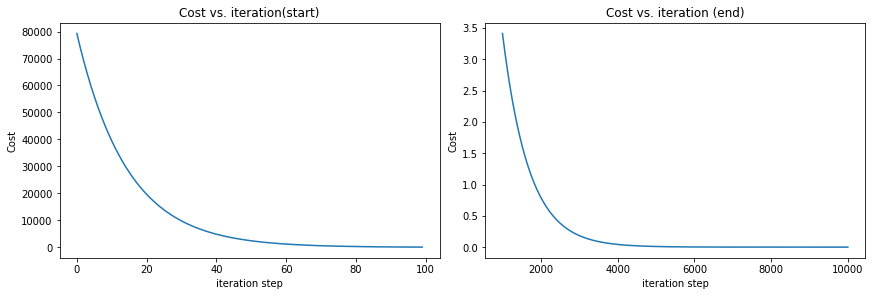

In [6]:
def main():
    # initialize parameters
    w_init = 0
    b_init = 0

    # some gradient descent settings
    num_iters = 10000
    alpha     = 1.0e-2
    rel_err   = 1.0e-3

    # Load our data set
    x_train = np.array([1.0, 2.0])   #features
    y_train = np.array([300.0, 500.0])   #target value

    # run gradient descent
    w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, alpha, num_iters, rel_err)
    print(f"(J, w, b) found by gradient descent: ({J_hist[-1]:0.7f}, {w_final:8.4f}, {b_final:8.4f})")
    
    # plot
    plot(J_hist)

if __name__ == '__main__':
    main()
    